[![Project Status: Active – The project has reached a stable, usable state and is being actively developed.](https://www.repostatus.org/badges/latest/active.svg)](https://www.repostatus.org/#active)
[![PyPI version](https://badge.fury.io/py/geoshapes.svg)](https://badge.fury.io/py/geoshapes)

You can run this notebook example from [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/abiraihan/geoshapes/8dce2f8f508184582c0584756541ea49534b8036?urlpath=lab%2Ftree%2Fexample%2FgridShape.ipynb) without installing any python dependency.

## gridShape

In [13]:
import shapely, geopandas
from geoshapes import gridShape
%matplotlib inline

### squareGrid
See **help(gridShape.hexagonGrid)** for more details about the parameters
1. squareGrid requires geopandas dataframe or shapefile as geometry data
2. squareGrid requires length of the sqaure side for the spacing 
3. squareGrid also cut the geometry according to the geometry area

In [14]:
#help(gridShape.squareGrid)

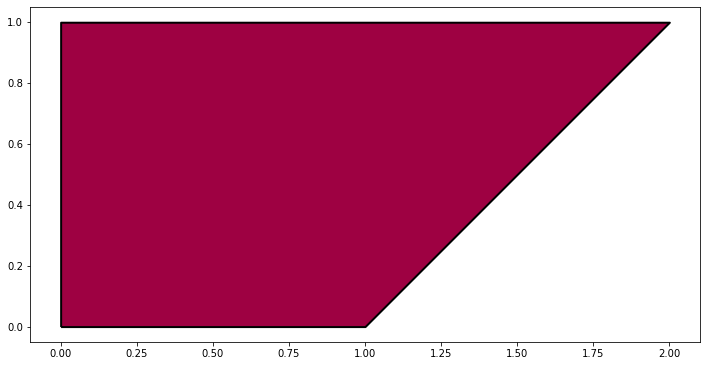

In [15]:
polys = [shapely.geometry.Polygon([(0, 0), (1, 1), (1, 0)]),
         shapely.geometry.Polygon([(0, 0), (1, 1), (0, 1)]),
         shapely.geometry.Polygon([(1, 0), (1, 1), (2, 1)])
        ]
polysGeos = geopandas.GeoDataFrame(geometry = [shapely.ops.unary_union(polys)])
polysGeos.plot(cmap = 'Spectral', figsize = (12, 9), edgecolor = 'k',linewidth = 2)
polysGeos = polysGeos.set_crs('EPSG:4326')

<AxesSubplot:>

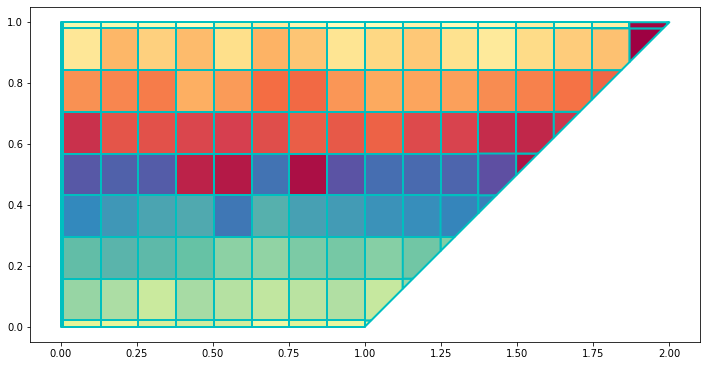

In [4]:
square = gridShape.squareGrid(boundary = polysGeos, length = 13000, cut = True)
square.plot(cmap = 'Spectral', figsize = (12, 9), edgecolor = 'c',linewidth = 2)

<AxesSubplot:>

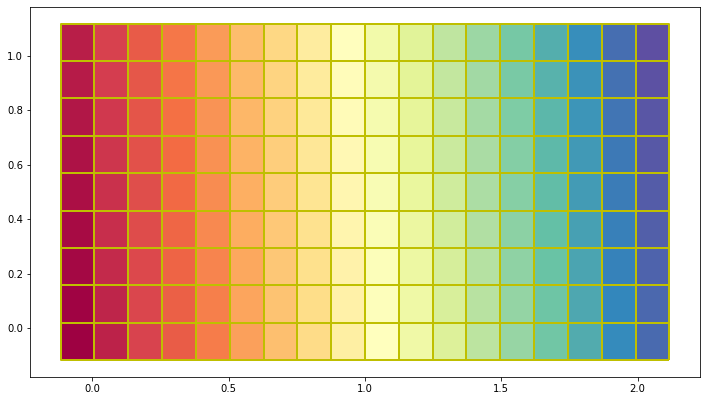

In [5]:
square = gridShape.squareGrid(boundary = polysGeos, length = 13000, cut = False)
square.plot(cmap = 'Spectral', figsize = (12, 9), edgecolor = 'y',linewidth = 2)

### hexagonGrid
See **help(gridShape.hexagonGrid)** for more details about the parameters
1. hexagonGrid requires geopandas dataframe as geometry data
2. hexagonGrid requires length of the hexagon side for the spacing 
3. hexagonGrid also cut the geometry according to the geometry area

In [6]:
#help(gridShape.hexagonGrid)

<AxesSubplot:>

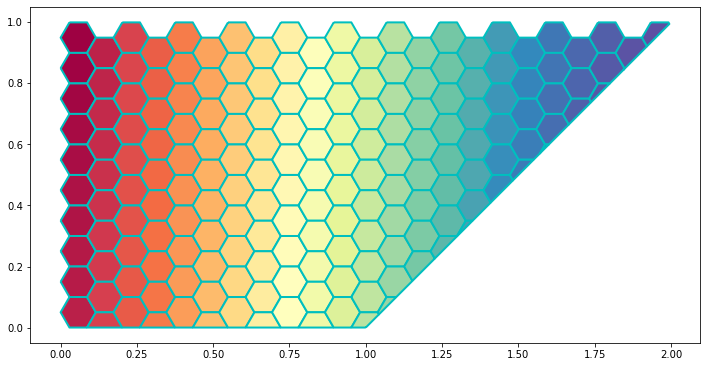

In [7]:
hexagon = gridShape.hexagonGrid(gdf = polysGeos, spacing = 10000, cut = True)
hexagon.plot(cmap = 'Spectral', figsize = (12, 9), edgecolor = 'c',linewidth = 2)

<AxesSubplot:>

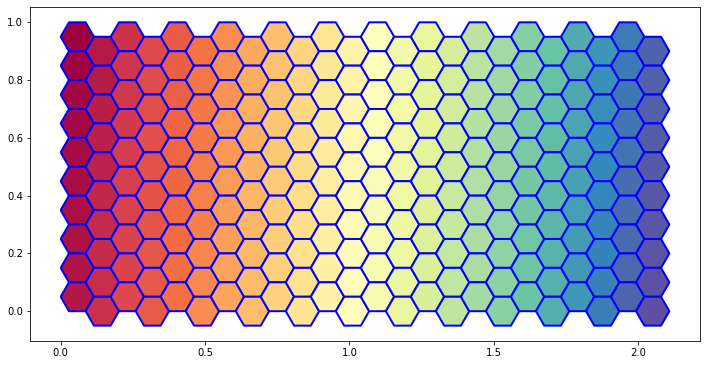

In [8]:
hexagon = gridShape.hexagonGrid(gdf = polysGeos, spacing = 10000, cut = False)
hexagon.plot(cmap = 'Spectral', figsize = (12, 9), edgecolor = 'b', linewidth = 2)

### sanitizeGrid
See **help(gridShape.sanitizeGrid)** for more details about the parameters
1. sanitizeGrid requires geopandas dataframe as geometry data
2. sanitizeGrid requires tolearnce values for spatial seperability of the geometry, Default is 11 (1.1 cm) and tolerance value should be always more than 11

In [9]:
#help(gridShape.sanitizeGrid)

In [10]:
geoms = [i for i in hexagon.geometry if i.area*1e10/4046.86>= 21399]

<AxesSubplot:>

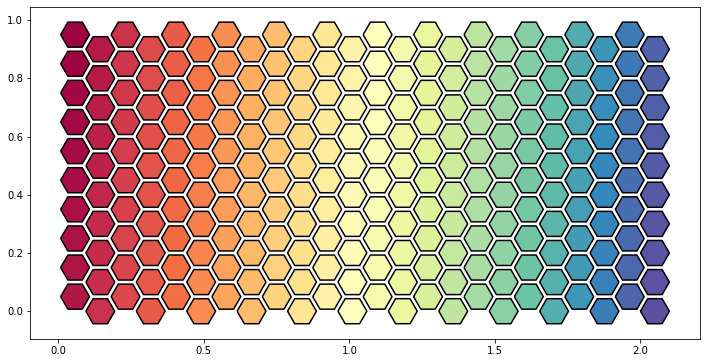

In [11]:
geosList = geopandas.GeoDataFrame(geometry = geoms, crs = 'EPSG:4326')
sanitized = gridShape.sanitizeGrid(geosList, 7e6)
sanitized.plot(cmap = 'Spectral', figsize = (12, 9), edgecolor = 'k', linewidth=1.5)

<AxesSubplot:>

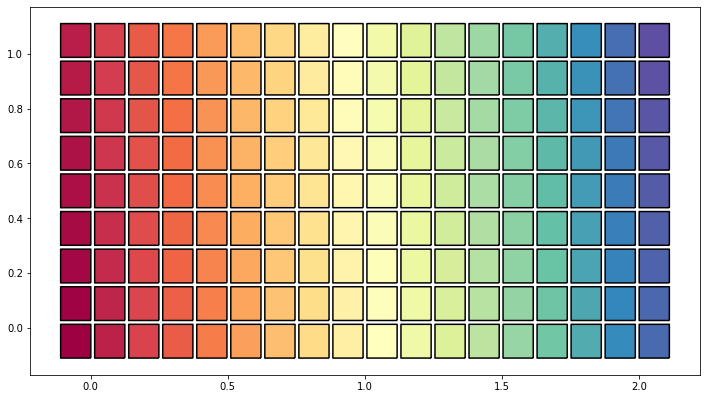

In [12]:
sanitizedSqaure = gridShape.sanitizeGrid(square, 7e6)
sanitizedSqaure.plot(cmap = 'Spectral', figsize = (12, 9), edgecolor = 'k', linewidth=1.5)